Podatki so shranjeni v dveh tabelah. Prva tabela vsebuje id restavracije, ime restavracije, mesto in državo, v kateri se restavracija nahaja, oceno restavracije od 1 do 5, število ocen in cenovni razred od 1 do 4. Druga tabela vsebuje id restavracije in njen tip. Podatke je potrebno shraniti v dveh različnih tabelah, ker ima lahko posamezna restavracija več različnih tipov.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
%matplotlib inline

restavracije = pd.read_csv('tabela_restavracij.csv')
tipi = pd.read_csv('tabela_tipov.csv')

In [12]:
restavracije

,id,Ime restavracije,Mesto,Država,Ocena,Število ocen,Cena
0,1,Adelaide Central Market,Adelaide,AUSTRALIA,4.5,77,1
1,2,Jamie’s Italian,Adelaide,AUSTRALIA,3.0,68,2
2,3,Bread &amp; Bone Wood Grill,Adelaide,AUSTRALIA,4.0,52,2
3,4,Burger Theory,Adelaide,AUSTRALIA,3.5,45,1
4,5,Etica Ethical Pizzeria &amp; Mozzarella Bar,Adelaide,AUSTRALIA,4.5,42,2
5,6,Press Food &amp; Wine,Adelaide,AUSTRALIA,4.0,42,3
6,7,Hey Jupiter,Adelaide,AUSTRALIA,4.0,40,2
7,8,Cafe Troppo,Adelaide,AUSTRALIA,4.0,41,1
8,9,Coffee Branch,Adelaide,AUSTRALIA,4.5,38,1
9,10,Mandoo,Adelaide,AUSTRALIA,4.5,41,2


In [3]:
tipi

,id,Tip restavracije
0,1,Food Court
1,1,Fruits & Veggies
2,1,Health Markets
3,2,Italian
4,3,American (Traditional)
5,3,Burgers
6,4,Burgers
7,4,American (Traditional)
8,4,Street Vendors
9,5,Italian


Vsaka restavracija spada v določen cenovni razred od 1 do 4 in vsak gost lahko oceni restavracijo z 1 do 5 zvezdicami. Zanima nas ali cena restavracije vpliva na višino ocene. Za vsak cenovni razred izračunamo povprečno oceno.

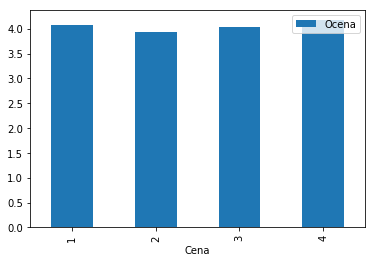

In [4]:
po_ceni = restavracije[['Ocena', 'Cena']].groupby('Cena').mean()
po_ceni.plot(kind='bar')

Zanima nas kateri tipi restavracij so najpogostejši:

In [7]:
sestavljena = pd.merge(restavracije, tipi)
pogostost = sestavljena.groupby('Tip restavracije').count()['id'].sort_values(ascending=False)
pogostost[:20]

Tip restavracije
American (New)            1493
Breakfast & Brunch        1291
American (Traditional)     903
Seafood                    864
Italian                    774
Bars                       760
Burgers                    639
Mexican                    598
Sandwiches                 584
Pizza                      578
Japanese                   548
Sushi Bars                 488
Cafes                      450
Steakhouses                410
Asian Fusion               347
Cocktail Bars              346
Wine Bars                  332
French                     319
Mediterranean              303
Barbeque                   301
Name: id, dtype: int64

Poleg tega nas zanima tudi zastopanost tipov v posameznih državah. Kateri tip restavracije je na primer v posamezni državi najbolj zastopan?

In [8]:
zastopanost_tipov = sestavljena.groupby(['Država', 'Tip restavracije']).size()
matrika_zastopanosti = zastopanost_tipov.unstack()
matrika_zastopanosti.idxmax(axis=1)

Država
ARGENTINA               Argentine
AUSTRALIA                    Bars
AUSTRIA                  Austrian
AZ                 American (New)
BELGIUM                   Belgian
BRAZIL                  Brazilian
CA                 American (New)
CANADA             Canadian (New)
CHILE                     Chilean
CO                 American (New)
                      ...        
SWITZERLAND                  Bars
TAIWAN                  Taiwanese
TN                       Southern
TURKEY                    Turkish
TX                 American (New)
UT             Breakfast & Brunch
VA                 American (New)
VT                 American (New)
WA                 American (New)
WI                 American (New)
dtype: object

Restavracije so najdražje v Čilu in najcenejše na Japonskem. Najbolje so bile ocenjene na Japonskem in najslabše v ameriški zvezni državi New Jersey.

In [64]:
restavracije.groupby('Država').mean()['Cena'].sort_values(ascending=False)

Država
CHILE          2.560000
FRANCE         2.420000
PHILIPPINES    2.347826
FINLAND        2.300000
BRAZIL         2.290000
SINGAPORE      2.260000
BELGIUM        2.230000
CANADA         2.222857
DC             2.220000
SWEDEN         2.220000
                 ...   
NM             1.900000
IN             1.890000
NC             1.886667
TURKEY         1.880000
IA             1.860000
UT             1.820000
SPAIN          1.760000
POLAND         1.730000
DENMARK        1.700000
JAPAN          1.610000
Name: Cena, dtype: float64

In [9]:
restavracije.groupby('Država').mean()['Ocena'].sort_values(ascending=False)

Država
JAPAN          4.400000
TURKEY         4.340000
PHILIPPINES    4.282609
PORTUGAL       4.280000
TAIWAN         4.230000
SPAIN          4.225000
ITALY          4.215000
BRAZIL         4.200000
CHILE          4.190000
KY             4.180000
                 ...   
MA             3.916667
MALAYSIA       3.916667
VA             3.893333
IL             3.848000
WA             3.843333
CA             3.837823
IA             3.830000
MI             3.820000
CT             3.805000
NJ             3.670000
Name: Ocena, dtype: float64

Najbolje ocenjeni in najdražji tipi restavracij:

In [9]:
ocene_tipov = sestavljena.groupby('Tip restavracije').mean()['Ocena'].sort_values(ascending=False)
ocene_tipov[:20]

Tip restavracije
Yakiniku            4.80
Horumon             4.75
Imported Food       4.75
Kaiseki             4.50
Dumplings           4.50
Tablao Flamenco     4.50
Syrian              4.50
Friterie            4.50
Fruits & Veggies    4.50
Galician            4.50
Georgian            4.50
Guest Houses        4.50
Hawker Centre       4.50
South African       4.50
Soba                4.50
Hostels             4.50
Custom Cakes        4.50
Internet Cafes      4.50
Shopping            4.50
Kopitiam            4.50
Name: Ocena, dtype: float64

In [11]:
cenovni_razredi_tipov = sestavljena.groupby('Tip restavracije').mean()['Cena'].sort_values(ascending=False)
cenovni_razredi_tipov[:20]

Tip restavracije
Rodizios                3.666667
Dinner Theater          3.500000
Lumbard                 3.000000
Sardinian               3.000000
Northern German         3.000000
Speakeasies             3.000000
Guest Houses            3.000000
Oaxacan                 3.000000
Nikkei                  3.000000
Cooking Schools         3.000000
Tablao Flamenco         3.000000
Arroceria / Paella      3.000000
Wine Tasting Classes    3.000000
Nightlife               3.000000
Chilean                 2.888889
Hotels                  2.833333
Steakhouses             2.807317
Performing Arts         2.800000
Fondue                  2.769231
Modern Australian       2.764706
Name: Cena, dtype: float64

Abscisna os predstavlja število restavracij posameznega tipa, ordinatna os pa povprečno oceno restavracij posameznega tipa restavracije. Vidimo, da so bili najpogostejši tipi ocenjeni z oceno okrog 4.

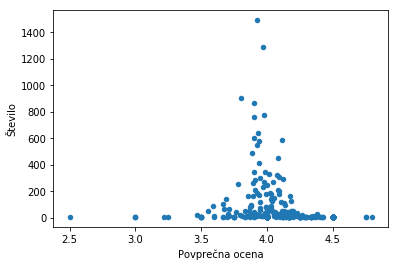

In [62]:
tabela_ocen_tipov = pd.DataFrame({'Tip restavracije':ocene_tipov.index, 'Povprečna ocena':ocene_tipov.values})
tabela_pogostosti = pd.DataFrame({'Tip restavracije':pogostost.index, 'Število':pogostost.values})
pd.merge(tabela_ocen_tipov, tabela_pogostosti).sort_values('Število', ascending=False).plot.scatter(x='Povprečna ocena', y='Število')